In [1]:
import pandas as pd
import io
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib
import matplotlib.pyplot as plt 


In [2]:
#!pip install numpy

In [3]:
#you can also find the csv 
#url = 'https://raw.githubusercontent.com/mcelikkaya/medium_articles2/main/user_movie_rating.csv'
#df_user_movie_rating = pd.read_csv(url)


df_user_movie_rating = pd.read_csv("D:/user_movie_rating.csv")

In [4]:
len(df_user_movie_rating)

105339

In [7]:
df_user_movie_rating.head(5)

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,9,16,4.0,Casino (1995),Crime|Drama
2,12,16,1.5,Casino (1995),Crime|Drama
3,24,16,4.0,Casino (1995),Crime|Drama
4,29,16,3.0,Casino (1995),Crime|Drama


In [8]:
#checks unique values
df_user_movie_rating.nunique()

userId       668
movieId    10325
rating        10
title      10323
genres       938
dtype: int64

In [9]:
#get the max id in set, and add yourself as next user
max_id = max(df_user_movie_rating["userId"])
print("max_id :",max_id)
my_id = max_id + 1
print("my_id :",my_id)

max_id : 668
my_id : 669


In [10]:
#create a map of movieId -> title
title_movieId_map = { y:x for x,y in df_user_movie_rating[ ["movieId","title"] ].to_numpy() }
#'Casino (1995)': 16,
# 'Powder (1995)': 24,

In [11]:
#defines movies that you want to rate 5 or whatever u want (change the 5 at 1st loop )
my_5_list = ['Braveheart (1995)','Seven (a.k.a. Se7en) (1995)','Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
             'Star Wars: Episode VI - Return of the Jedi (1983)','Seven Samurai (Shichinin no samurai) (1954)',
             'Shrek 2 (2004)','Truman Show, The (1998)','Terminator, The (1984)','Rocky (1976)','Mummy, The (1999)'
             ]

#defines movies that you want to rate 2 or whatever u want (change the 2 at 2nd loop )
my_2_list = [ 'Dumb & Dumber (Dumb and Dumber) (1994)','Kill Bill: Vol. 2 (2004)','Space Jam (1996)' ]

for my_5 in my_5_list:
    movide_id = title_movieId_map[my_5] 
    df_user_movie_rating.loc[len(df_user_movie_rating)] = [my_id, movide_id, 5,my_5,"nogenre"] 

for my_2 in my_2_list:
    movide_id = title_movieId_map[my_2] 
    df_user_movie_rating.loc[len(df_user_movie_rating)] = [my_id, movide_id, 2,my_2,"nogenre"] 

In [12]:
#check your ratings
df_user_movie_rating[df_user_movie_rating["userId"]==my_id ]

,userId,movieId,rating,title,genres
105339,669,110,5.0,Braveheart (1995),nogenre
105340,669,47,5.0,Seven (a.k.a. Se7en) (1995),nogenre
105341,669,32,5.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),nogenre
105342,669,1210,5.0,Star Wars: Episode VI - Return of the Jedi (1983),nogenre
105343,669,2019,5.0,Seven Samurai (Shichinin no samurai) (1954),nogenre
105344,669,8360,5.0,Shrek 2 (2004),nogenre
105345,669,1682,5.0,"Truman Show, The (1998)",nogenre
105346,669,1240,5.0,"Terminator, The (1984)",nogenre
105347,669,1954,5.0,Rocky (1976),nogenre
105348,669,2617,5.0,"Mummy, The (1999)",nogenre


In [13]:
#check ratings of a movie
#df_user_movie_rating[ df_user_movie_rating["movieId"] == 1073  ] 

In [14]:
#create utility maps
movieId_genres_map = { x:y for x,y in df_user_movie_rating[ ["movieId","genres"] ].to_numpy() }
movieId_title_map = { x:y for x,y in df_user_movie_rating[ ["movieId","title"] ].to_numpy() }

genres_sorted = [movieId_genres_map[k] for k in sorted(movieId_genres_map.keys())]
title_sorted = [movieId_title_map[k] for k in sorted(movieId_title_map.keys())]

index_movieId_map = { index:k for index,k in enumerate(sorted(movieId_genres_map.keys())) }
movieId_index_map = { index_movieId_map[k]:k for k in index_movieId_map.keys() }

print( len(movieId_title_map) )
print(title_sorted[0:4])
print(movieId_title_map[1] )
print(movieId_title_map[2] )
    

10325
['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)']
Toy Story (1995)
Jumanji (1995)


In [15]:
#index_movieId_map[0]
#title_sorted

In [16]:
#group by userid,movieid and fill empty values with 0
#we can also fill with avg
user_item = df_user_movie_rating.groupby(['userId', 'movieId'])['rating'].first().unstack(fill_value=0.0)
print(user_item.shape)

(669, 10325)


In [17]:
#get user ids 
user_ids = user_item.index.values.flatten()


In [18]:
user_item.head(4)

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from scipy.sparse.linalg import svds
import numpy as np

In [20]:
#apply svd for different latent dims
def apply_svd_with_dim( latent_dim ):
  user_f, features, f_movie = svds(user_item, k = latent_dim)
  feature_diag_matrix=np.diag(features)
  return user_f,feature_diag_matrix,f_movie,features

#for the generated matrixes generate predictions
def generate_predictions(user_f,feature_diag_matrix,f_movie):
  predicted_ratings = np.dot(np.dot(user_f, feature_diag_matrix), f_movie)    
  preds_df = pd.DataFrame(predicted_ratings, columns = user_item.columns, index=user_item.index)
  return preds_df

#utility method to apply svd and generate a dataframe with it
def get_svd(dim_latent):
  user_feature,feature_diag_matrix,movie_feature,features = apply_svd_with_dim(dim_latent)
  df_predictions = generate_predictions(user_feature,feature_diag_matrix,movie_feature)
  df_movie_feature = pd.DataFrame( )
  #print(features)
  df_movie_feature[ "genres"] = genres_sorted
  df_movie_feature[ "title"] = title_sorted
  df_movie_feature[ "movie_feature"] = movie_feature.T.tolist() 
  return df_movie_feature,features,df_predictions

In [21]:
#generate data for different dimensions

df_movie_feature5 ,features_5,df_predictions5 = get_svd(5)
df_movie_feature20,features_20,df_predictions20 = get_svd(20)
df_movie_feature50,features_50,df_predictions50 = get_svd(50)

df_movie_feature100,features_100,df_predictions100 = get_svd(100)
df_movie_feature200,features_200,df_predictions200 = get_svd(200)

In [22]:
#check features matrixes, u can think these as weights
#and if u see a number which is much less than others you can remove
#probably it is noise
print("features_5",features_5)
print("")
print("features_20",features_20)
print("")
print("features_50",features_50)
print("")
print("features_100",features_100)

features_5 [160.90105453 176.50354004 220.42877044 230.86015596 541.57372104]

features_20 [ 93.48631205  94.38514462  95.68863921  97.44113044 101.13641678
 104.0215854  107.16268388 110.28730529 113.45205702 118.47315723
 120.30630581 123.04858606 130.20027085 138.34731952 143.71249278
 160.90105453 176.50354004 220.42877044 230.86015596 541.57372104]

features_50 [ 67.77497152  68.11315447  68.42066932  69.48851931  69.72274153
  70.15760936  70.64460945  71.35687876  72.04342246  72.49456943
  72.73573032  73.72084696  74.05905354  75.09842337  75.75286308
  76.53708969  78.38528137  79.1801502   80.15156481  80.36982411
  81.50654181  81.70485319  83.48856827  84.10398337  85.47397733
  87.99522526  88.34491791  89.15460291  89.73142791  92.29512081
  93.48631205  94.38514462  95.68863921  97.44113044 101.13641678
 104.0215854  107.16268388 110.28730529 113.45205702 118.47315723
 120.30630581 123.04858606 130.20027085 138.34731952 143.71249278
 160.90105453 176.50354004 220.428770

In [25]:
#TODO remove
user_feature,feature_diag_matrix,movie_feature,features = apply_svd_with_dim(5)
print( user_feature.shape )
print( feature_diag_matrix.shape )
print( movie_feature.shape )
print(features)

df_predictions = generate_predictions(user_feature,feature_diag_matrix,movie_feature)
df_movie_feature = pd.DataFrame( )



df_movie_feature[ "genres"] = genres_sorted
df_movie_feature[ "title"] = title_sorted
df_movie_feature[ "movie_feature"] = movie_feature.T.tolist() 

(669, 5)
(5, 5)
(5, 10325)
[160.90105453 176.50354004 220.42877044 230.86015596 541.57372104]


In [26]:
#df_predictions = generate_predictions(user_feature,feature_diag_matrix,movie_feature)
#df_predictions.shape

In [27]:
df_predictions.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
userId,,,,,,,,,,,,,,,,,,,,,
1,2.244121,0.781555,-0.019930,0.023924,0.108648,0.819317,0.047663,0.008983,-0.035280,1.053225,...,0.021298,-0.007142,-0.054427,-0.004081,0.022276,0.013699,0.008562,-0.006122,-0.086983,-0.008163
2,0.417457,0.228670,0.155480,0.053551,0.159560,0.287265,0.194862,0.018741,0.066500,0.456863,...,-0.004044,-0.001901,0.000255,-0.001086,-0.007021,-0.003007,-0.001880,-0.001630,0.001294,-0.002173
3,1.376954,0.864621,0.532816,0.190015,0.598891,0.951395,0.685031,0.080138,0.254902,1.869014,...,-0.010661,-0.010658,0.013479,-0.006090,-0.023350,-0.002002,-0.001251,-0.009135,0.041111,-0.012180


In [28]:
#user_ids.tolist()  669

In [29]:
#create a user feature dataframe

df_user_features = pd.DataFrame( )

df_user_features[ "user_id"] = user_ids.tolist() 
df_user_features[ "user_feature"] = user_feature.tolist() 
df_user_features.head( 5 )


,user_id,user_feature
0,1,"[0.06382285500333078, -0.014155681199677516, 0..."
1,2,"[0.0015994635519848777, 0.01367331704126093, 0..."
2,3,"[0.033567701410516695, 0.07147524576436985, 0...."
3,4,"[0.05153228288548356, -0.04589555038793302, -0..."
4,5,"[0.000724424135900615, 0.002951478419209708, 0..."


In [30]:
#create a user movie dataframe
df_movie_feature = pd.DataFrame( )
df_movie_feature[ "genres"] = genres_sorted
df_movie_feature[ "title"] = title_sorted
df_movie_feature[ "movie_feature"] = movie_feature.T.tolist() 

In [31]:
#len(df_movie_feature.iloc[0].to_numpy()[0])
df_movie_feature.head(4)

,genres,title,movie_feature
0,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),"[0.03023206340790512, 0.004140776526474332, 0...."
1,Adventure|Children|Fantasy,Jumanji (1995),"[0.0029633795935668636, 0.03420429912517415, 0..."
2,Comedy|Romance,Grumpier Old Men (1995),"[-0.01999921508513389, 0.03217626962055229, -0..."
3,Comedy|Drama|Romance,Waiting to Exhale (1995),"[-0.001016369036543841, 0.007298146514648678, ..."


In [32]:
features_numpy = np.array( [ np.array(x) for x in  df_movie_feature[ "movie_feature"].to_numpy() ])
features_numpy.shape

(10325, 5)

In [33]:
features_numpy[0]

array([ 0.03023206,  0.00414078,  0.04535296, -0.0388622 , -0.07300348])

In [34]:
movieId = df_user_movie_rating[ df_user_movie_rating["title"] == "Star Wars: Episode IV - A New Hope (1977)"]["movieId"].iloc[0]
#movieId = 260
index = movieId_index_map[movieId]
print(f"index {index} -> movieId{movieId} ")

index 230 -> movieId260 


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

def get_movie_id_byname(title):
  movieId = df_user_movie_rating[ df_user_movie_rating["title"] == title]["movieId"].iloc[0]
  index = movieId_index_map[movieId]
  return index ,movieId

def get_similarity_for_movie(df_movie_features,title,top_n=10,dump_results=False):

  features_numpy = np.array( [ np.array(x) for x in  df_movie_features[ "movie_feature"].to_numpy() ])

  index ,movieId = get_movie_id_byname( title )
  all_cosines = cosine_similarity(features_numpy[index].reshape(1,-1),features_numpy)
  all_cosines = all_cosines.flatten()
  top_indexes = all_cosines.argsort()[-1 * top_n:][::-1]
  #print(top_indexes)
  similar_results = []
  for top_index in top_indexes:
    #top_index+1 because movie ids begin from 0
    if dump_results: 
      print( f"{index_movieId_map[top_index]} ){all_cosines[top_index]} -> {movieId_title_map[index_movieId_map[top_index]]}")
    movie_name = movieId_title_map[index_movieId_map[top_index]]
    similar_results.append( [ top_index,index_movieId_map[top_index],all_cosines[top_index],movie_name]  )
  return similar_results   

def get_similarity_for_user(df_user_features_,user_index,top_n=4,dump_results=False):
  index = user_index - 1
  features_numpy = np.array( [ np.array(x) for x in  df_user_features_[ "user_feature"].to_numpy() ])

  all_cosines = cosine_similarity(features_numpy[index].reshape(1,-1),features_numpy)
  all_cosines = all_cosines.flatten()
  top_indexes = all_cosines.argsort()[-1 * top_n:][::-1]
  print(top_indexes)
  similar_results = []
  for top_index in top_indexes[1:]:
        similar_user = top_index + 1
        df_sub = df_user_movie_rating[ df_user_movie_rating["userId"] == similar_user ]
        df_sub = df_sub.sort_values(by=['rating'], ascending=False)
        similar_results.extend( df_sub[["userId","rating","title"]].head(5).to_numpy() )
  
  return similar_results   

In [36]:
#get similar users with you and show their top rated movies
#Are results good?
pd.DataFrame( np.array(get_similarity_for_user(df_user_features,my_id)) ,columns=["userId","rating","Movie"])

[668 666 167 492]


,userId,rating,Movie
0,667,5.0,"Hours, The (2002)"
1,667,5.0,"Lord of the Rings: The Fellowship of the Ring,..."
2,667,4.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3,667,4.5,Being John Malkovich (1999)
4,667,4.5,Seven (a.k.a. Se7en) (1995)
5,168,5.0,"Lion King, The (1994)"
6,168,5.0,"Shawshank Redemption, The (1994)"
7,168,5.0,Jerry Maguire (1996)
8,168,5.0,Star Wars: Episode V - The Empire Strikes Back...
9,168,5.0,Forrest Gump (1994)


In [37]:
#dump suggestions for different dimensions
#Are results getting better when dimension is higher?
models = [df_movie_feature5,df_movie_feature20,df_movie_feature50,df_movie_feature100]
names  = ["df_movie_feature5","df_movie_feature20","df_movie_feature50","df_movie_feature100"]
movie_name = "Star Wars: Episode IV - A New Hope (1977)"
for model_,name in zip( models,names) :
    print(name)
    similar_results = get_similarity_for_movie(model_,movie_name ,top_n=10,dump_results=True)
  
    

df_movie_feature5
260 )1.0000000000000002 -> Star Wars: Episode IV - A New Hope (1977)
1198 )0.9907068054182815 -> Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
1270 )0.9879725725429758 -> Back to the Future (1985)
1196 )0.9801329176833984 -> Star Wars: Episode V - The Empire Strikes Back (1980)
2028 )0.9689809951432004 -> Saving Private Ryan (1998)
2799 )0.9609155371642213 -> Problem Child 2 (1991)
1089 )0.949603646801789 -> Reservoir Dogs (1992)
1210 )0.9445297114803557 -> Star Wars: Episode VI - Return of the Jedi (1983)
1136 )0.9423509725778274 -> Monty Python and the Holy Grail (1975)
1265 )0.9368680097768936 -> Groundhog Day (1993)
df_movie_feature20
260 )0.9999999999999998 -> Star Wars: Episode IV - A New Hope (1977)
1210 )0.9571210743716894 -> Star Wars: Episode VI - Return of the Jedi (1983)
1 )0.8106156519992324 -> Toy Story (1995)
780 )0.8105105328344275 -> Independence Day (a.k.a. ID4) (1996)
1196 )0.7539218449003093 -> Star Wars: Episode V 

In [38]:
def get_2d_map(df_movie_feature_,title,item_count):
    similar_results = get_similarity_for_movie(df_movie_feature_, title ,item_count,False)

    features_numpy = np.array( [ np.array(x) for x in  df_movie_feature_[ "movie_feature"].to_numpy() ])
    pca = PCA(2)
    features_numpy_2d = pca.fit_transform( features_numpy )
    indexes = np.array(similar_results)[:,0]
    movie_names = np.array(similar_results)[:,3]
    
    feature_indexes = indexes.tolist()
    data_2d = features_numpy_2d[np.asarray(indexes).astype("int8") ,:]
    return data_2d[:,0:1],data_2d[:,1],movie_names


def draw_on_2d(x,y,labels):
    fig, ax = plt.subplots()
    fig.set_size_inches(10,10)
    ax.scatter(x, y)

    for i, txt in enumerate(labels):
        txt = txt[0:txt.find("(")]
        ax.annotate(txt, (x[i], y[i]))

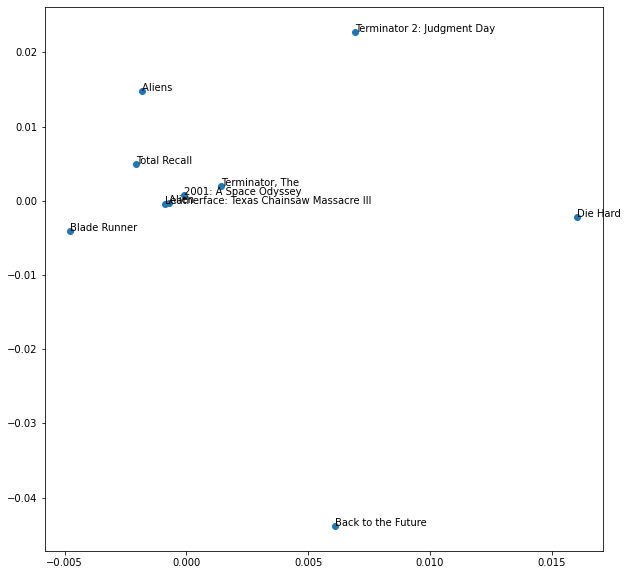

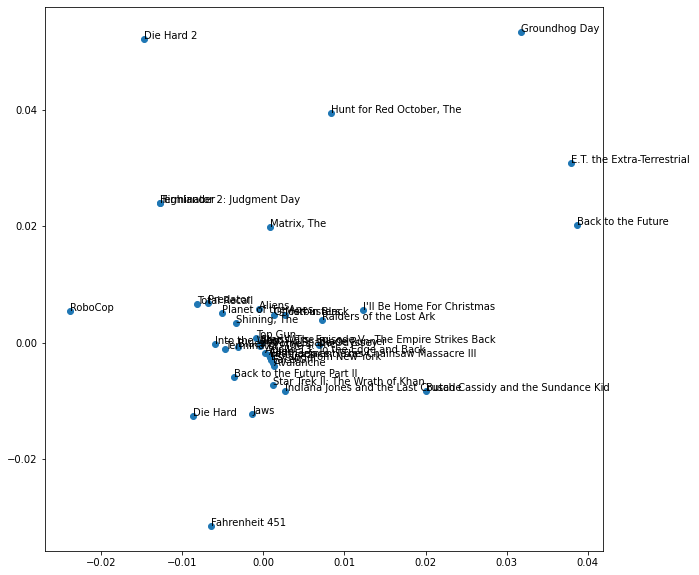

In [39]:
#Find 10 most similar movie to Terminator for 50 features
x,y,movie_names = get_2d_map(df_movie_feature50,'Terminator, The (1984)',10)
_ = draw_on_2d( x,y,movie_names  )
#Find 100 most similar movie to Terminator
x,y,movie_names = get_2d_map(df_movie_feature50,'Terminator, The (1984)',40)
_ = draw_on_2d( x,y,movie_names  )

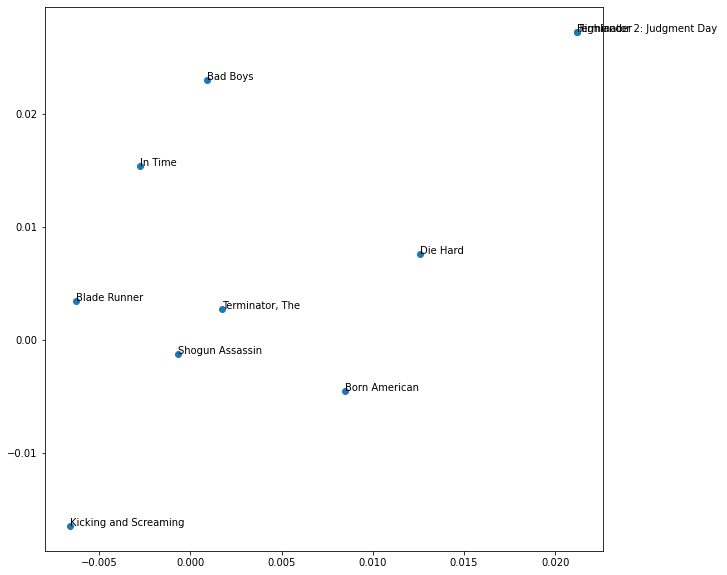

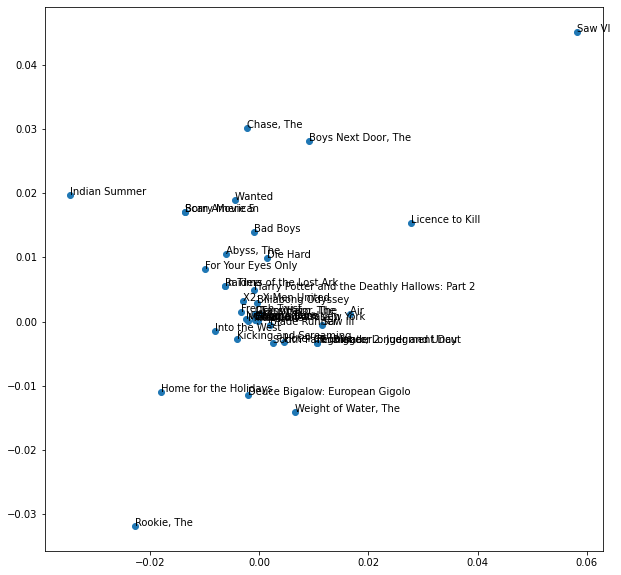

In [40]:
#Find 10 most similar movie to Terminator
x,y,movie_names = get_2d_map(df_movie_feature200,'Terminator, The (1984)',10)
_ = draw_on_2d( x,y,movie_names  )
#Find 100 most similar movie to Terminator
x,y,movie_names = get_2d_map(df_movie_feature200,'Terminator, The (1984)',40)
_ = draw_on_2d( x,y,movie_names  )